# Tweets in Fake Covid-19 dataset classified by their category (false, partially false) - Pie chart 

The goal is to visualize a pie chart with the classification of the tweets by their category, so we need the following libraries:

In [ ]:
import plotly.express as px
import json
import pandas as pd
import csv
import itertools
from collections import Counter

For the classification purposes we need to read the csv then the json:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We simply read the tweets ID and then memorize their category in a list; from that list we count the 'false' and 'partially false' occurrencies with Counter and then we can create the dataframe for the pie chart:

In [ ]:
category = []
index = 0

for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    category.append(lista_unica_csv[indice_csv+1].lower())
    index=index+1

count = Counter(category)

df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'Category', 0:'Count'})

We're ready to visualize the pie chart:

In [ ]:
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, values='Count', names='Category',
             title='Tweets in Fake Covid-19 dataset classified by their category (false, partially false)')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
fig.show()

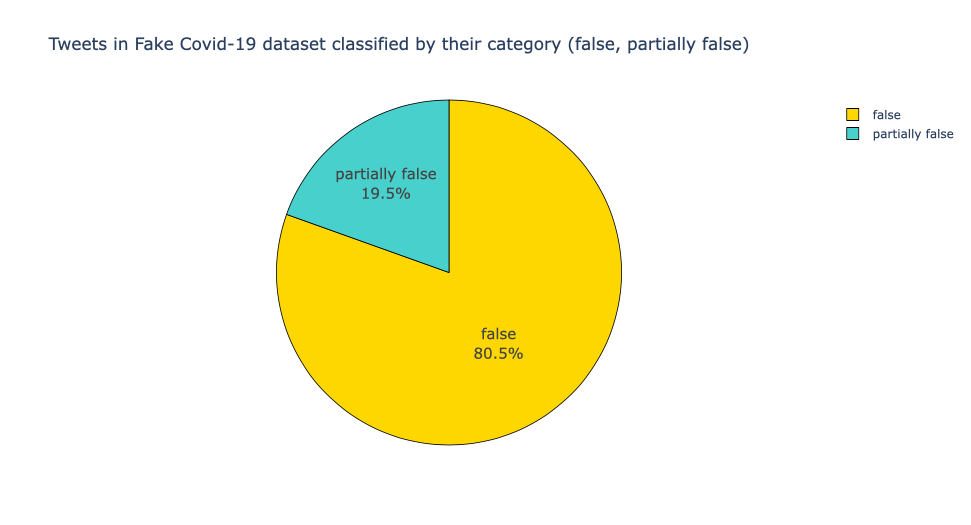